In [50]:
from diffusion import Diffusion
from data import Data
import torch
import numpy as np
import matplotlib.pyplot as plt
import copy
from model import AE, AE_0
%load_ext autoreload
%autoreload 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu"); print(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cuda:0


In [67]:
ntot = 4      # number of samples
d = 10000     # dimensions
epochs = 300 # training
p = 0.8       # imbalance prob
N = 1000      # generation size
std = d ** (1/2) # std of initial sample
N_steps=100   # number of "discretization" steps for ODE
# data
nrm = 1
σ = 1
μ = torch.ones(d)
model_class = AE

weight_decay_dict = {
    'w': 1e-1,
    #'u': 1e-2,
    'b': 1e-1,
    'c': 0.
}

In [64]:
def opt_gen(model):
    return torch.optim.Adam([{'params': [getattr(model,k)], 'weight_decay': v} for k, v in weight_decay_dict.items()], lr=.04)

In [65]:
α  = lambda t: (1-t) * std
β  = lambda t: t

X_train = Data(ntot,μ,σ,d,p,α,β,device)
X_train.gen_rand()
X_gen   = np.random.randn(N,d) * std

diffusion = Diffusion(α, β, model_class, opt_gen, X_train, copy.deepcopy(X_gen), N_steps, epochs, ntot, d, device)
diffusion.run()

0.0
0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.07
0.08
0.09
0.09999999999999999
0.10999999999999999
0.11999999999999998
0.12999999999999998
0.13999999999999999
0.15
0.16
0.17
0.18000000000000002
0.19000000000000003
0.20000000000000004
0.21000000000000005
0.22000000000000006
0.23000000000000007
0.24000000000000007
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900000000000003
0.6

In [54]:
diffusion.summary['p']

[0.52,
 0.52,
 0.52,
 0.52,
 0.52,
 0.52,
 0.521,
 0.521,
 0.521,
 0.521,
 0.521,
 0.522,
 0.523,
 0.523,
 0.522,
 0.522,
 0.522,
 0.522,
 0.522,
 0.522,
 0.522,
 0.522,
 0.522,
 0.521,
 0.522,
 0.522,
 0.521,
 0.521,
 0.521,
 0.521,
 0.522,
 0.521,
 0.521,
 0.521,
 0.521,
 0.52,
 0.521,
 0.521,
 0.523,
 0.524,
 0.523,
 0.524,
 0.522,
 0.523,
 0.521,
 0.52,
 0.52,
 0.518,
 0.517,
 0.517,
 0.522,
 0.521,
 0.519,
 0.52,
 0.521,
 0.521,
 0.518,
 0.516,
 0.518,
 0.517,
 0.525,
 0.522,
 0.528,
 0.531,
 0.531,
 0.531,
 0.545,
 0.534,
 0.546,
 0.558,
 0.558,
 0.572,
 0.584,
 0.598,
 0.605,
 0.609,
 0.614,
 0.619,
 0.631,
 0.646,
 0.651,
 0.656,
 0.669,
 0.68,
 0.689,
 0.699,
 0.707,
 0.72,
 0.728,
 0.738,
 0.749,
 0.754,
 0.761,
 0.766,
 0.781,
 0.785,
 0.792,
 0.793,
 0.794,
 0.795,
 0.802]

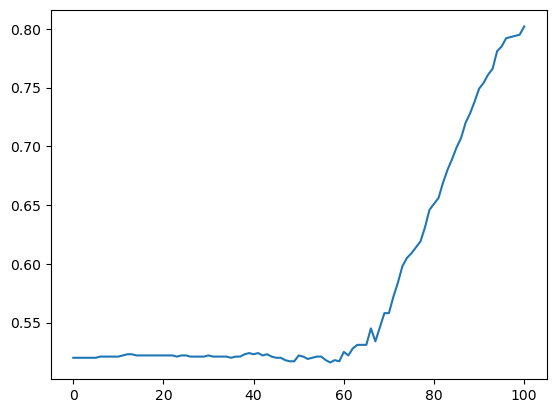

In [55]:
plt.plot(diffusion.summary['p'])

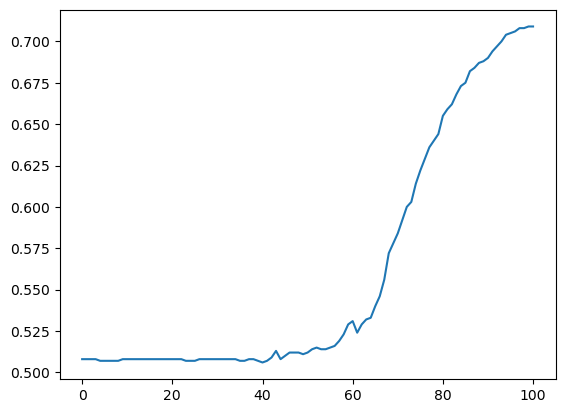

In [258]:
plt.plot(diffusion.summary['p'])

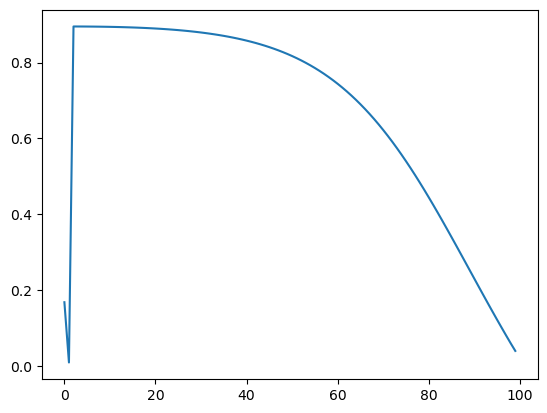

In [66]:
#aa = diffusion.summary
plt.plot(np.abs(diffusion.summary['Cos w']))

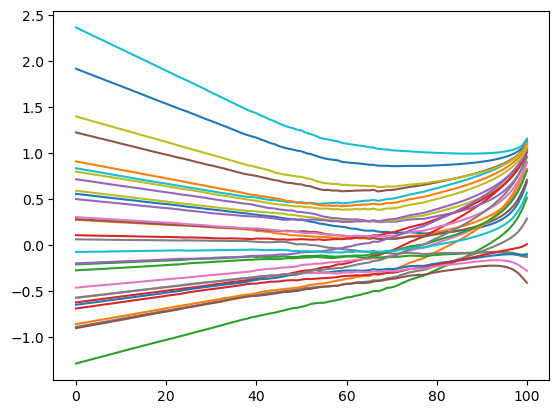

In [58]:
c = np.array(diffusion.summary['M_t'])
plt.plot(c[:, :30]);
#plt.xlim(0, 10)
#plt.ylim(-1000, 1000)

In [ ]:
plt.plot(np.abs(diffusion.summary['M_t']))

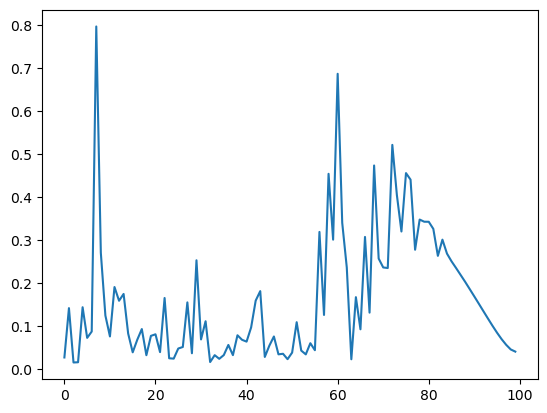

In [28]:
plt.plot(np.abs(diffusion.summary['b']))

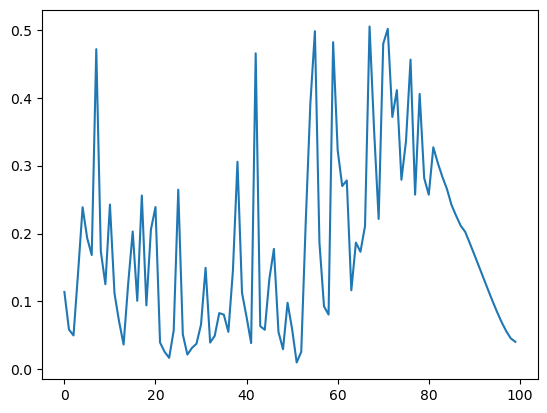

In [21]:
plt.plot(np.abs(diffusion.summary['b']))

In [152]:
h =.7
np.exp(h) / (np.exp(h) + np.exp(-h))

0.8021838885585818

Parameter containing:
tensor([0.0407], device='cuda:0', requires_grad=True)

In [176]:
np.squeeze(diffusion.summary['b'])

array([-0.24237856, -0.18517567, -0.08569282, -0.04752747, -0.07197905,
       -0.02127837,  0.13866986,  0.40545735,  0.13472305,  0.29752564,
        0.04609858,  0.03901266,  0.0216643 , -0.29642087, -0.17507198,
       -0.0230961 ,  0.07688341, -0.34528017,  0.08496984, -0.14356656,
        0.41727975, -0.4731516 ,  0.25538227,  0.3507327 , -0.24012567,
       -0.22038652, -0.21145304,  0.23723297,  0.12629214, -0.09266087,
       -0.3920231 ,  0.05276276,  0.17055084, -0.04583064, -0.12660573,
        0.25815588, -0.43304068, -0.23330696,  0.01883644, -0.24169149,
        0.33061123,  0.7058765 ,  0.32413706, -0.49449322, -0.26010242,
        0.26441136, -0.05052217,  0.09438808,  0.2629473 , -0.19198358,
       -0.22340357,  0.31609145,  0.2230807 , -0.43097386, -0.55342805,
       -0.5793349 ,  0.45244512, -0.13350907,  0.5794398 ,  0.2721771 ,
       -0.2930483 ,  0.05622589,  0.1143105 , -0.31892654,  0.1876652 ,
       -0.01951504,  0.14018495, -0.20586605,  0.37555087, -0.03

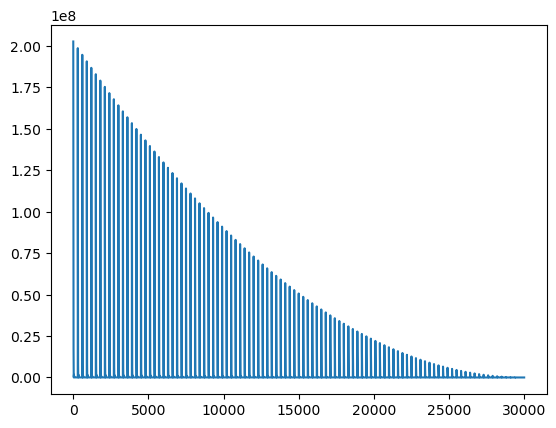

In [178]:
plt.plot(diffusion.losses)

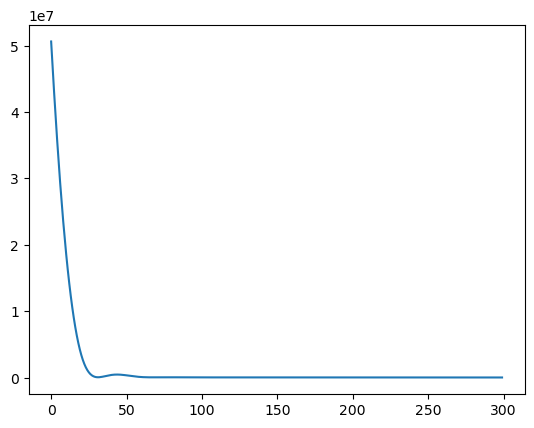

In [177]:
#k = 10
#plt.semilogy(diffusion.losses[k * epochs:(k+1) * epochs])
k = 5
plt.plot(diffusion.losses[k * epochs:(k+1) * epochs])
#plt.plot(diffusion.losses)

In [55]:
mu = np.ones(d)
np.mean(diffusion.X_gen @ mu > 0)

0.481

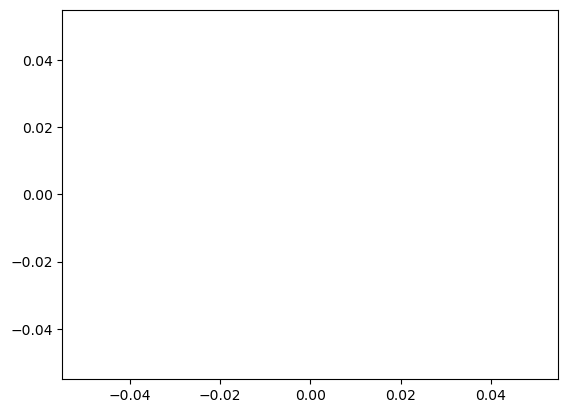

In [9]:
plt.plot(np.abs(diffusion.summary['Cos w']))
plt.show()

In [68]:
diffusion.X_gen @ mu

array([-10255.93066605, -10122.83572213, -10163.00633891, -10105.34532639,
       -10143.17758401,  10127.51506974,   9993.40886718, -10143.53556192,
        10241.52420495,   9991.30824356, -10087.90499913, -10133.25744899,
        10216.09850842, -10062.37002531,  10058.8140669 ,   9939.05903654,
        10035.83999498,  10024.86567217,  10075.30448466, -10098.16137013,
        10056.28300401, -10013.51279491, -10120.86676251, -10168.14923152,
        10090.4950184 ,   9985.61723268, -10060.81800018,  10055.26387651,
        10055.54160629,  10225.4321603 ,  10002.25523408,  10206.49270274,
       -10092.17202996,  10125.16261444,  10029.13143381,  10146.67692197,
        10042.04351625, -10120.84507667, -10116.54550407,  10054.68685022,
        10072.44947371, -10007.18284436, -10071.91903427,  10145.89087365,
       -10184.91194332,  10164.44441075, -10149.2347282 , -10081.68153683,
       -10241.63088394, -10091.64052593,  10085.68249915,  10100.30789333,
       -10116.68044911, -

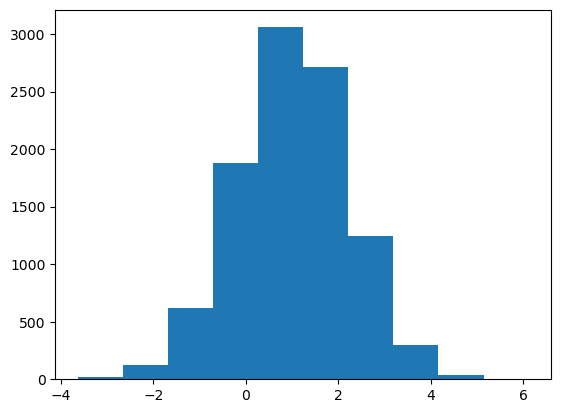

In [69]:
plt.hist(diffusion.X_gen[5])
plt.show()

In [ ]:
X_gen.shape

(1000, 100)